#📌 Extracão

In [20]:
import pandas as pd


In [21]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

In [7]:
dados = pd.read_json(url)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [23]:
# prompt: extrair os dados aninhados das colunas: "customer", "phone", "internet" e "account" e acrescentar as novas colunas com os pares dos dicionários ao dataframe "dados"

def normalizar_e_expandir(df, coluna, prefixo):
  dados_normalizados = pd.json_normalize(df[coluna], sep='_')
  dados_normalizados.columns = [f'{prefixo}_{col}' for col in dados_normalizados.columns]
  df = pd.concat([df.drop(coluna, axis=1), dados_normalizados], axis=1)
  return df

dados = normalizar_e_expandir(dados, 'customer', 'cliente')
dados = normalizar_e_expandir(dados, 'phone', 'telefone')
dados = normalizar_e_expandir(dados, 'internet', 'internet')
dados = normalizar_e_expandir(dados, 'account', 'conta')
dados


KeyError: 'customer'

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             7267 non-null   object 
 1   Churn                  7267 non-null   object 
 2   genero                 7267 non-null   object 
 3   idoso                  7267 non-null   int64  
 4   parceiro               7267 non-null   int64  
 5   tem_dependentes        7267 non-null   object 
 6   tempo_servico          7267 non-null   int64  
 7   servico_telefone       7267 non-null   int64  
 8   multiplas_linhas       7267 non-null   int64  
 9   servico_internet       7267 non-null   object 
 10  seguranca_online       7267 non-null   object 
 11  backup_online          7267 non-null   object 
 12  protecao_dispositivo   7267 non-null   object 
 13  suporte_tecnico        7267 non-null   object 
 14  streaming_tv           7267 non-null   object 
 15  stre

In [25]:
dados.columns

Index(['id_cliente', 'Churn', 'genero', 'idoso', 'parceiro', 'tem_dependentes',
       'tempo_servico', 'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'contrato', 'fatura_sem_papel', 'metodo_pagamento',
       'conta_Charges_Monthly', 'conta_Charges_Total'],
      dtype='object')

In [26]:
# prompt:  entender a estrutura do dataset e o significado de suas colunas. Essa etapa ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes

print("\nDescrição do Dataset:")
print(dados.head())
print("\nInformações sobre as colunas:")
print(dados.info())
print("\Estatísticas descritivas das colunas numéricas:")
print(dados.describe())



Descrição do Dataset:
   id_cliente Churn     genero  idoso  parceiro tem_dependentes  \
0  0002-ORFBO    No   Feminino      0         1             Yes   
1  0003-MKNFE    No  Masculino      0         0              No   
2  0004-TLHLJ   Yes  Masculino      0         0              No   
3  0011-IGKFF   Yes  Masculino      1         1              No   
4  0013-EXCHZ   Yes   Feminino      1         1              No   

   tempo_servico  servico_telefone  multiplas_linhas servico_internet  ...  \
0              9                 1                 0              DSL  ...   
1              9                 1                 1              DSL  ...   
2              4                 1                 0     Fibra Óptica  ...   
3             13                 1                 0     Fibra Óptica  ...   
4              3                 1                 0     Fibra Óptica  ...   

  backup_online protecao_dispositivo suporte_tecnico streaming_tv  \
0             1                    0

In [27]:
# prompt: verifique se há problemas nos dados que possam afetar a

print("\nVerificando valores ausentes:")
print(dados.isnull().sum())

print("\nVerificando duplicados:")
print(dados.duplicated().sum())

print("\nVerificando tipos de dados das colunas:")
print(dados.dtypes)

# Converter colunas numéricas com vírgula decimal para ponto
for col in ['conta_MonthlyCharges', 'conta_TotalCharges']:
    if col in dados.columns:
        dados[col] = dados[col].astype(str).str.replace(',', '.').astype(float)

# Verificar novamente os tipos de dados após a conversão
print("\nVerificando tipos de dados após a conversão:")
print(dados.dtypes)

# Verificar estatísticas descritivas após a conversão
print("\nEstatísticas descritivas das colunas numéricas após a conversão:")
print(dados.describe())

# Verificar valores únicos em colunas categóricas para identificar inconsistências
print("\nVerificando valores únicos em colunas categóricas:")
for col in ['cliente_gender', 'cliente_Partner', 'cliente_Dependents', 'telefone_MultipleLines',
            'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
            'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
            'internet_StreamingMovies', 'conta_Contract', 'conta_PaperlessBilling',
            'conta_PaymentMethod', 'conta_Churn']:
    if col in dados.columns:
        print(f"- {col}: {dados[col].unique()}")

# Verificar a distribuição de classes na variável alvo (se houver)
if 'conta_Churn' in dados.columns:
    print("\nDistribuição da variável alvo (conta_Churn):")
    print(dados['conta_Churn'].value_counts(normalize=True))




Verificando valores ausentes:
id_cliente               0
Churn                    0
genero                   0
idoso                    0
parceiro                 0
tem_dependentes          0
tempo_servico            0
servico_telefone         0
multiplas_linhas         0
servico_internet         0
seguranca_online         0
backup_online            0
protecao_dispositivo     0
suporte_tecnico          0
streaming_tv             0
streaming_filmes         0
contrato                 0
fatura_sem_papel         0
metodo_pagamento         0
conta_Charges_Monthly    0
conta_Charges_Total      0
dtype: int64

Verificando duplicados:
0

Verificando tipos de dados das colunas:
id_cliente                object
Churn                     object
genero                    object
idoso                      int64
parceiro                   int64
tem_dependentes           object
tempo_servico              int64
servico_telefone           int64
multiplas_linhas           int64
servico_internet        

In [28]:
# prompt: ALTERAR O NOME DAS COLUNAS

dados.rename(columns={'customerID': 'id_cliente',
                       'cliente_gender': 'genero',
                       'cliente_SeniorCitizen': 'idoso',
                       'cliente_Partner': 'parceiro',
                       'cliente_Dependents': 'tem_dependentes',
                       'cliente_tenure': 'tempo_servico',
                       'telefone_MultipleLines': 'multiplas_linhas',
                       'internet_InternetService': 'servico_internet',
                       'internet_OnlineSecurity': 'seguranca_online',
                       'internet_OnlineBackup': 'backup_online',
                       'internet_DeviceProtection': 'protecao_dispositivo',
                       'internet_TechSupport': 'suporte_tecnico',
                       'internet_StreamingTV': 'streaming_tv',
                       'internet_StreamingMovies': 'streaming_filmes',
                       'conta_Contract': 'contrato',
                       'conta_PaperlessBilling': 'fatura_sem_papel',
                       'conta_PaymentMethod': 'metodo_pagamento',
                       'conta_MonthlyCharges': 'cobranca_mensal',
                       'conta_TotalCharges': 'cobranca_total',
                       'telefone_PhoneService': 'servico_telefone',
                       'conta_Churn': 'churn'}, inplace=True)

print("\nNomes das colunas após a renomeação:")
dados


Nomes das colunas após a renomeação:


,id_cliente,Churn,genero,idoso,parceiro,tem_dependentes,tempo_servico,servico_telefone,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_sem_papel,metodo_pagamento,conta_Charges_Monthly,conta_Charges_Total
0,0002-ORFBO,No,Feminino,0,1,Yes,9,1,0,DSL,...,1,0,1,1,0,Anual,1,Cheque Enviado,65.60,593.3
1,0003-MKNFE,No,Masculino,0,0,No,9,1,1,DSL,...,0,0,0,0,1,Mensal,0,Cheque Enviado,59.90,542.4
2,0004-TLHLJ,Yes,Masculino,0,0,No,4,1,0,Fibra Óptica,...,0,1,0,0,0,Mensal,1,Cheque Eletrônico,73.90,280.85
3,0011-IGKFF,Yes,Masculino,1,1,No,13,1,0,Fibra Óptica,...,1,1,0,1,1,Mensal,1,Cheque Eletrônico,98.00,1237.85
4,0013-EXCHZ,Yes,Feminino,1,1,No,3,1,0,Fibra Óptica,...,0,0,1,1,0,Mensal,1,Cheque Enviado,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Feminino,0,0,No,13,1,0,DSL,...,0,0,1,0,0,Anual,0,Cheque Enviado,55.15,742.9
7263,9992-RRAMN,Yes,Masculino,0,1,No,22,1,1,Fibra Óptica,...,0,0,0,0,1,Mensal,1,Cheque Eletrônico,85.10,1873.7
7264,9992-UJOEL,No,Masculino,0,0,No,2,1,0,DSL,...,1,0,0,0,0,Mensal,1,Cheque Enviado,50.30,92.75
7265,9993-LHIEB,No,Masculino,0,1,Yes,67,1,0,DSL,...,0,1,1,0,1,Bianual,0,Cheque Enviado,67.85,4627.65


In [29]:
# prompt: ALTERAR OS REGISTROS

# Corrigir valores na coluna 'genero'
dados['genero'] = dados['genero'].replace('Male', 'Masculino').replace('Female', 'Feminino')

# Mapear 'Yes' e 'No' para 'Sim' e 'Nao' nas colunas relevantes
colunas_sim_nao = ['parceiro', 'dependentes', 'servico_telefone',
                   'seguranca_online', 'backup_online', 'protecao_dispositivo',
                   'suporte_tecnico', 'streaming_tv', 'streaming_filmes',
                   'fatura_sem_papel', 'churn']

for col in colunas_sim_nao:
    if col in dados.columns:
        dados[col] = dados[col].replace('Yes', 1).replace('No', 0)

# Corrigir valores na coluna 'servico_internet'
dados['servico_internet'] = dados['servico_internet'].replace('Fiber optic', 'Fibra Óptica').replace('No', 'Nao').replace('DSL', 'DSL')

# Corrigir valores na coluna 'multiplas_linhas

dados['multiplas_linhas'] = dados['multiplas_linhas'].replace('Yes', 1).replace('No', 0).replace('No phone service', 0)

# Corrigir valores na coluna 'contrato'
dados['contrato'] = dados['contrato'].replace('Month-to-month', 'Mensal').replace('One year', 'Anual').replace('Two year', 'Bianual')

# Corrigir valores na coluna 'metodo_pagamento'
dados['metodo_pagamento'] = dados['metodo_pagamento'].replace('Electronic check', 'Cheque Eletrônico').replace('Mailed check', 'Cheque Enviado').replace('Bank transfer (automatic)', 'Transferência Bancária (Automática)').replace('Credit card (automatic)', 'Cartão de Crédito (Automático)')

print("\nVerificando valores únicos após a correção:")
for col in ['genero', 'idoso', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas',
            'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
            'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'contrato',
            'fatura_sem_papel', 'metodo_pagamento', 'churn']:
    if col in dados.columns:
        print(f"- {col}: {dados[col].unique()}")

print("\nDados após as alterações:")
dados.head()


Verificando valores únicos após a correção:
- genero: ['Feminino' 'Masculino']
- idoso: [0 1]
- parceiro: [1 0]
- servico_telefone: [1 0]
- multiplas_linhas: [0 1]
- servico_internet: ['DSL' 'Fibra Óptica' 'Nao']
- seguranca_online: [0 1 'No internet service']
- backup_online: [1 0 'No internet service']
- protecao_dispositivo: [0 1 'No internet service']
- suporte_tecnico: [1 0 'No internet service']
- streaming_tv: [1 0 'No internet service']
- streaming_filmes: [0 1 'No internet service']
- contrato: ['Anual' 'Mensal' 'Bianual']
- fatura_sem_papel: [1 0]
- metodo_pagamento: ['Cheque Enviado' 'Cheque Eletrônico' 'Cartão de Crédito (Automático)'
 'Transferência Bancária (Automática)']

Dados após as alterações:


,id_cliente,Churn,genero,idoso,parceiro,tem_dependentes,tempo_servico,servico_telefone,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_sem_papel,metodo_pagamento,conta_Charges_Monthly,conta_Charges_Total
0,0002-ORFBO,No,Feminino,0,1,Yes,9,1,0,DSL,...,1,0,1,1,0,Anual,1,Cheque Enviado,65.6,593.3
1,0003-MKNFE,No,Masculino,0,0,No,9,1,1,DSL,...,0,0,0,0,1,Mensal,0,Cheque Enviado,59.9,542.4
2,0004-TLHLJ,Yes,Masculino,0,0,No,4,1,0,Fibra Óptica,...,0,1,0,0,0,Mensal,1,Cheque Eletrônico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,1,No,13,1,0,Fibra Óptica,...,1,1,0,1,1,Mensal,1,Cheque Eletrônico,98.0,1237.85
4,0013-EXCHZ,Yes,Feminino,1,1,No,3,1,0,Fibra Óptica,...,0,0,1,1,0,Mensal,1,Cheque Enviado,83.9,267.4


#📊 Carga e análise


Análise de influência de colunas categóricas no Churn (Yes):


/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


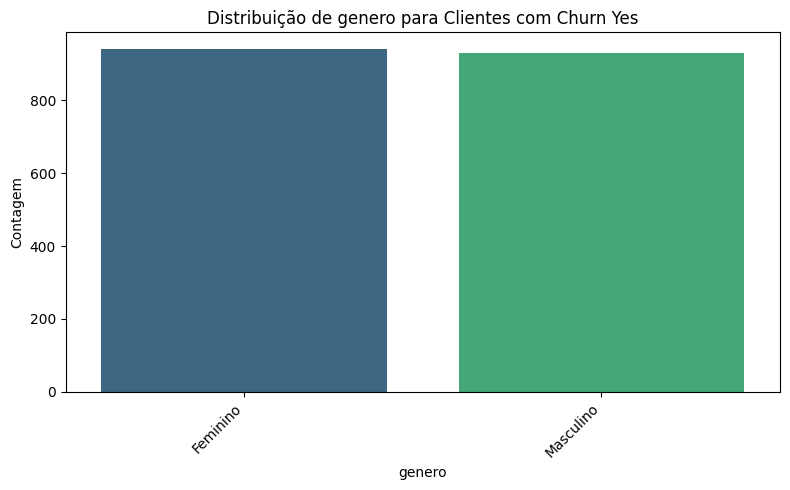

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


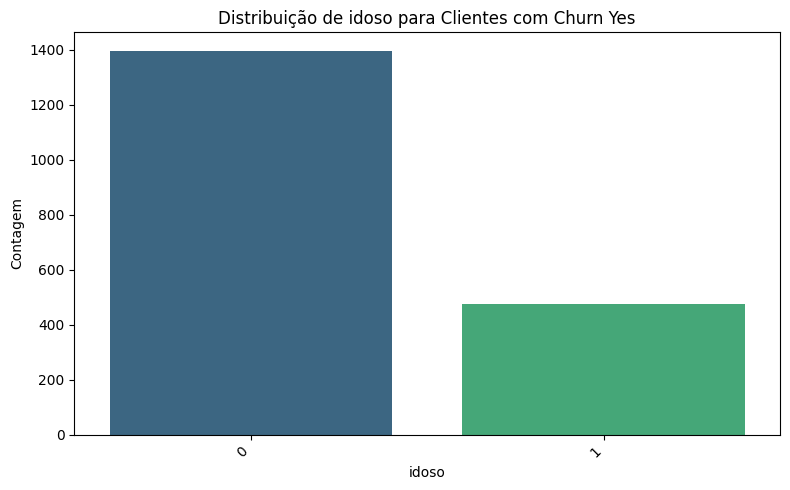

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


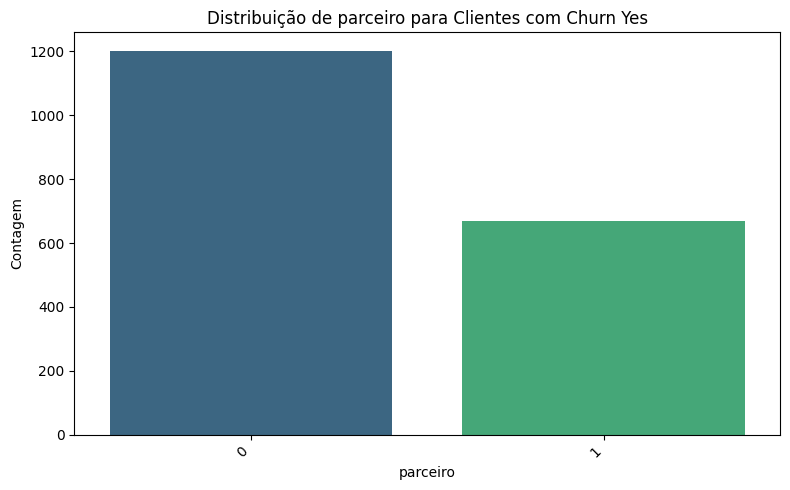

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


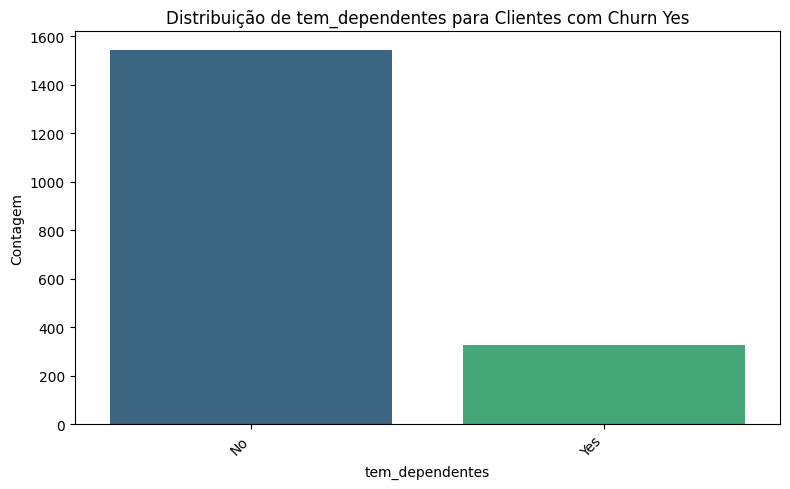

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


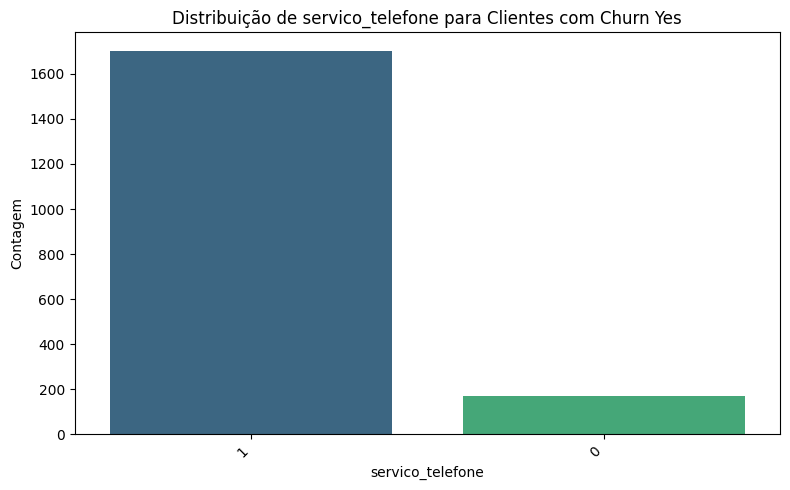

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


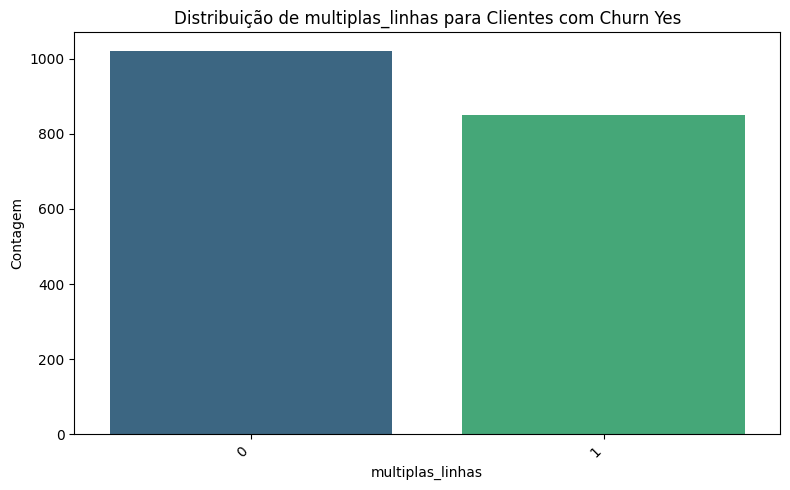

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


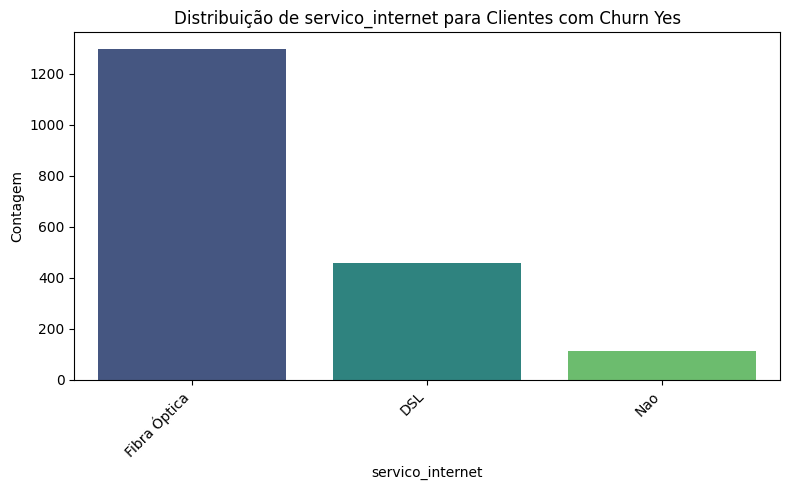

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


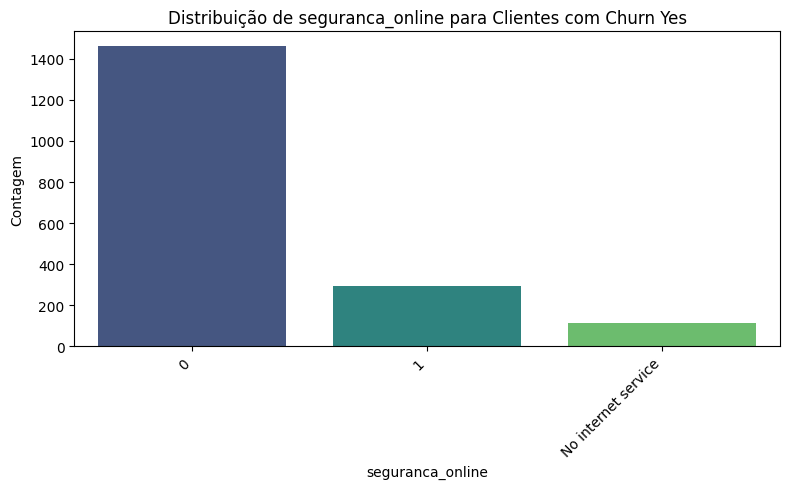

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


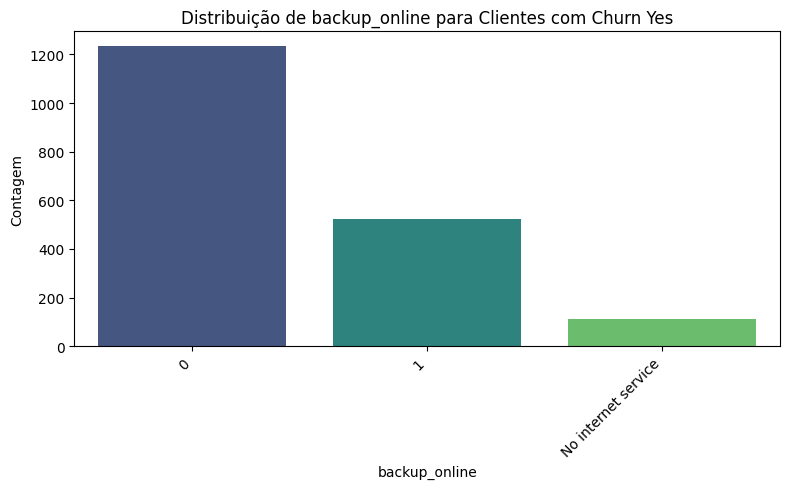

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


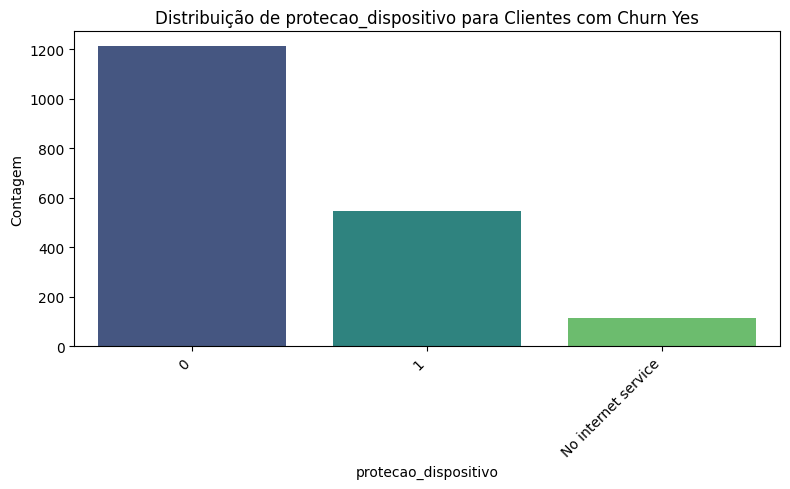

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


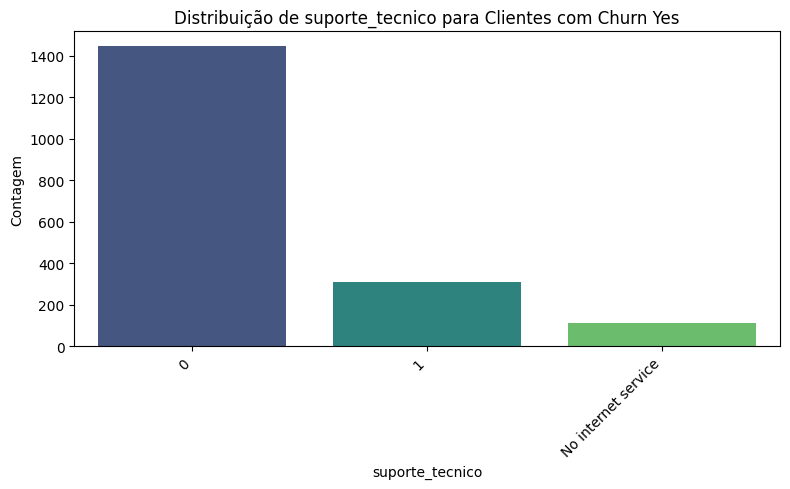

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


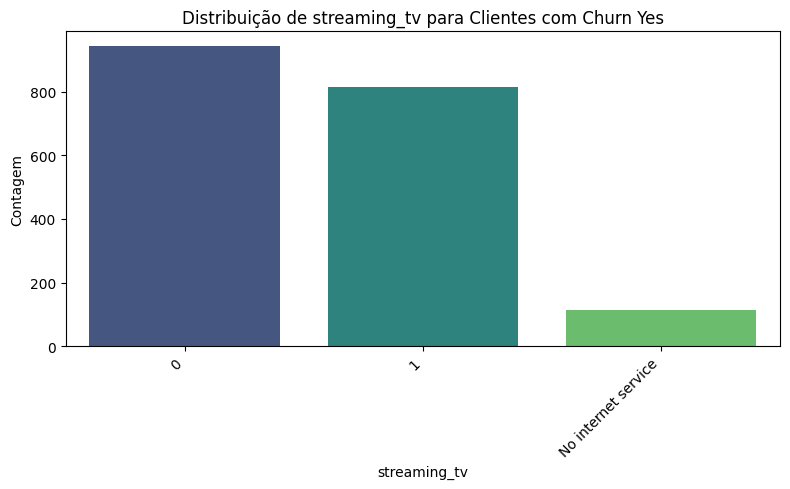

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


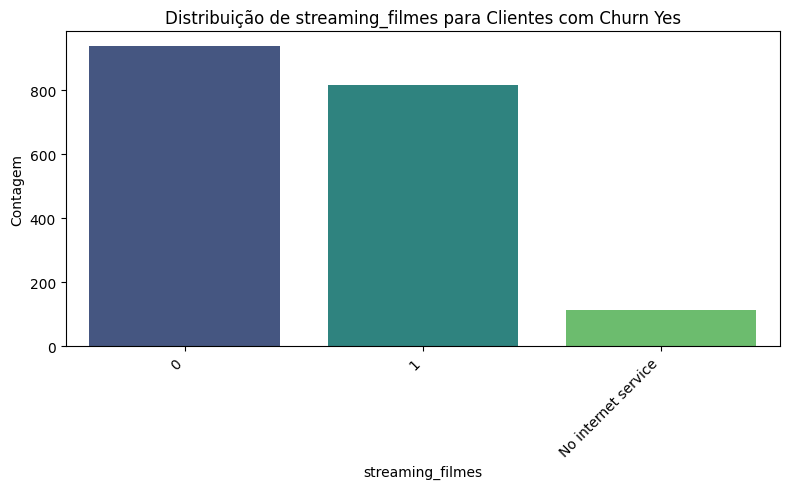

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


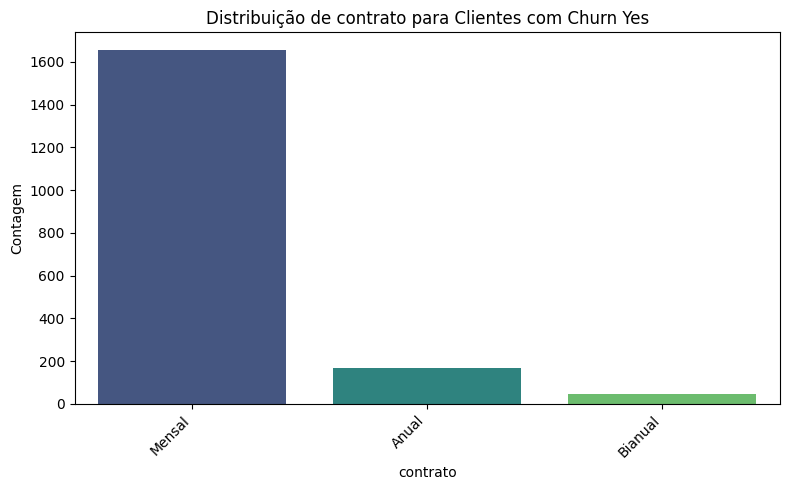

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


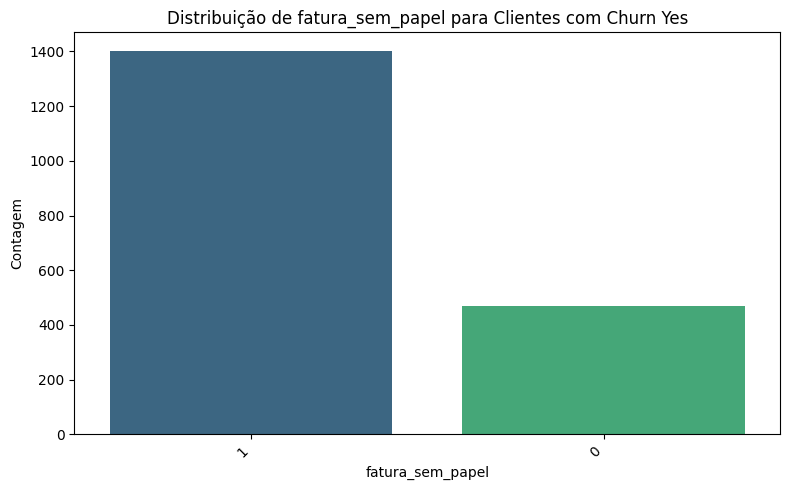

/tmp/ipython-input-31-2992590959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')


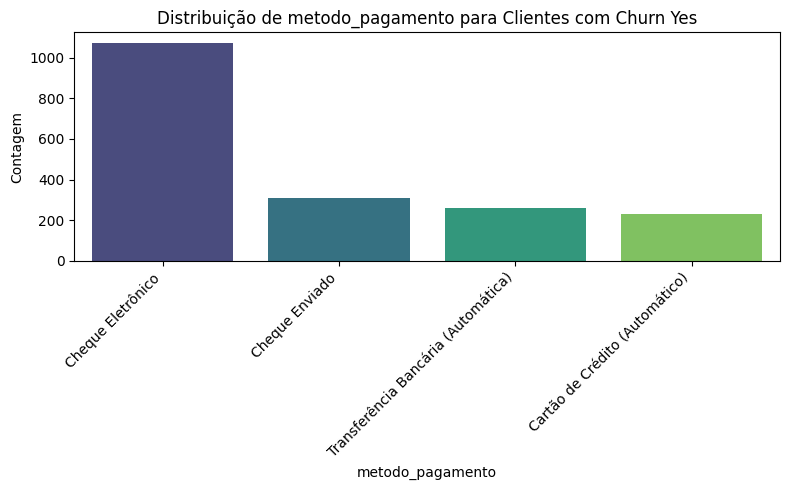

KeyError: 'cobranca_mensal'

In [31]:
# prompt: Monte gráficos mostrando quais colunas tem maior influencia para o valor "Yes" na coluna "Churn"

import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas relevantes para a análise de influência no churn 'Yes'
colunas_influencia = ['genero', 'idoso', 'parceiro', 'tem_dependentes', 'tempo_servico',
                      'servico_telefone', 'multiplas_linhas', 'servico_internet',
                      'seguranca_online', 'backup_online', 'protecao_dispositivo',
                      'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'contrato',
                      'fatura_sem_papel', 'metodo_pagamento', 'cobranca_mensal',
                      'cobranca_total']

# Filtrar o dataframe apenas para clientes com churn 'Yes'
dados_churn_yes = dados[dados['Churn'] == "Yes"]

# Analisar a influência de colunas categóricas
print("\nAnálise de influência de colunas categóricas no Churn (Yes):")
for col in colunas_influencia:
    if dados_churn_yes[col].dtype == 'object' or dados_churn_yes[col].nunique() < 10: # Tratar como categórica se for object ou tiver poucos valores únicos
        plt.figure(figsize=(8, 5))
        sns.countplot(data=dados_churn_yes, x=col, order=dados_churn_yes[col].value_counts().index, palette='viridis')
        plt.title(f'Distribuição de {col} para Clientes com Churn Yes')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Analisar a influência de colunas numéricas
print("\nAnálise de influência de colunas numéricas no Churn (Yes):")
for col in ['tempo_servico', 'cobranca_mensal', 'cobranca_total']:
    if col in dados_churn_yes.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=dados_churn_yes, x=col, kde=True, color='skyblue')
        plt.title(f'Distribuição de {col} para Clientes com Churn Yes')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.tight_layout()
        plt.show()

# Análise de correlação para colunas numéricas (pode indicar tendências)
colunas_numericas = ['tempo_servico', 'cobranca_mensal', 'cobranca_total']
dados_numericos_churn_yes = dados_churn_yes[colunas_numericas]

if not dados_numericos_churn_yes.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(dados_numericos_churn_yes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlação para Colunas Numéricas em Clientes com Churn Yes')
    plt.show()

print("\nObservações sobre a influência das colunas no Churn (Yes):")
print("- Os gráficos de barras para colunas categóricas mostram a distribuição de cada categoria entre os clientes que deram Churn.")
print("- As categorias com maior contagem nos gráficos têm maior representatividade no grupo de clientes que deram Churn.")
print("- Os histogramas para colunas numéricas mostram a distribuição dos valores para os clientes que deram Churn.")
print("- As áreas com picos nos histogramas indicam as faixas de valores mais comuns para clientes com Churn.")
print("- A matriz de correlação (para colunas numéricas) mostra a relação linear entre as variáveis numéricas dentro do grupo de clientes com Churn.")
print("- Correlações mais próximas de 1 ou -1 indicam uma relação mais forte.")


#📄Relatorio Final

Há uma influência bastante significativa para os valores 0(zero) ou seja ausência do parâmetro para as seguintes variáveis: servico_internet, seguranca_online, backup_online, protecao_dispositivo e suporte_tecnico.

Isso leva a crer que os consumidores com mais produtos contratados são os que menos cancelam.

Também percebemos que os contratos de vencimento mensal tem uma taxa de cancelamento significativamente maior do que a soma dos contratos anuais e bianuais.

Também há uma diferença significativa na forma de acesso a fatura, pois a taxa de cancelamento entre os clientes com fatura em papel também cancelam significativamente mais do que os que recebem de forma digital.

A difereça não é tão gritante na variável forma de pagamento, mas o "Cheque eletrônico" tem destaque no percentual de cancelamento.

Percebemos portanto, uma maior incidência de cancelamentos nos clientes:
 - com menos serviços contratados;
 - com pagamento mensal e não em longo prazo
 - sem acesso de forma digital (pagamento e acesso a fatura)
 - as demais variáveis não demostraram significativa influência no Churn.